# Лабораторная рабоата №1

# Подготовка
Импортируем Pandas:

In [9]:
# Установка необходимых библиотек
%pip install folium scikit-learn pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np

Загрузим необходимые данные:

In [11]:
!wget  -O 'data/input/laboratory_work1/end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1'

# Часть №1

## Задание №1
Откройте файл с таблицей и выведите 3 последних строки

In [12]:
df = pd.read_excel('data/input/laboratory_work1/end_seminar.xlsx')
df.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


### Сколько было уникальных пользователей из групп 18-го года набора, а сколько из групп 17-го года?

In [13]:
unique_18 = df[df['18_group'].notna()]['id'].nunique()
unique_17 = df[df['17_group'].notna()]['id'].nunique()

print(f"Уникальных студентов 18-го года набора: {unique_18}")
print(f"Уникальных студентов 17-го года набора: {unique_17}")

Уникальных студентов 18-го года набора: 213
Уникальных студентов 17-го года набора: 134


### Есть ли уникальные студенты с равными перцентилями?

In [14]:
unique_students = df['id'].nunique()
unique_percentiles = df['percentile'].nunique()

print(f"Уникальных студентов: {unique_students}")
print(f"Уникальных перцентилей: {unique_percentiles}")

if unique_students > unique_percentiles:
    print("\nДа, есть студенты с одинаковыми перцентилями")
    duplicated_percentiles = df[df.duplicated('percentile', keep=False)].sort_values('percentile')
    print(f"\nКоличество записей с дублирующимися перцентилями: {len(duplicated_percentiles)}")
else:
    print("\nНет, все студенты имеют уникальные перцентили")

Уникальных студентов: 347
Уникальных перцентилей: 346

Да, есть студенты с одинаковыми перцентилями

Количество записей с дублирующимися перцентилями: 30


## Задание №2
Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [15]:
missing_data = df.isna().sum()
missing_columns = missing_data[missing_data > 0]

if len(missing_columns) > 0:
    print("Пропуски обнаружены в следующих колонках:")
    print(missing_columns)
else:
    print("Пропусков в данных нет")

Пропуски обнаружены в следующих колонках:
18_group         138
is_mi            343
is_first_time      2
17_group         223
blended          223
is_ml_student    304
dtype: int64


Заполняем пропуски:

In [16]:
for column in df.columns:
    if df[column].isna().any():
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('')
        elif df[column].dtype == 'bool':
            df[column] = df[column].fillna(False)
        else:
            df[column] = df[column].fillna(0)

## Задание №3
Анализ колонки 'is_first_time': Каково процентное соотношение ответов? Сколько из них "Нет"?

In [17]:
first_time_counts = df['is_first_time'].value_counts()
first_time_percent = df['is_first_time'].value_counts(normalize=True) * 100

print("Распределение ответов 'is_first_time':")
print(first_time_counts)
print("\nПроцентное соотношение:")
print(first_time_percent)

no_count = (df['is_first_time'] == 'Нет').sum()
print(f"\nКоличество ответов 'Нет': {no_count}")

Распределение ответов 'is_first_time':
is_first_time
Да     308
Нет     51
         2
Name: count, dtype: int64

Процентное соотношение:
is_first_time
Да     85.318560
Нет    14.127424
        0.554017
Name: proportion, dtype: float64

Количество ответов 'Нет': 51


Удаляем повторные обращения, оставляя только последнюю версию

In [18]:
print(f"Размер данных до удаления дубликатов: {df.shape[0]}")

if 'timestamp' in df.columns:
    df = df.sort_values('timestamp')

df = df.drop_duplicates(subset='id', keep='last')

print(f"Размер данных после удаления дубликатов: {df.shape[0]}")
print(f"Удалено записей: {df.shape[0]}")

Размер данных до удаления дубликатов: 361
Размер данных после удаления дубликатов: 347
Удалено записей: 347


## Задание №4
Какие blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [19]:
fourth_year = df[df['17_group'].notna()]

# Список blended-курсов. Убираем пустые значения
blended_courses = fourth_year['blended'].value_counts()
blended_courses = blended_courses[blended_courses.index != '']

print("Blended-курсы для четверокурсников:")
print(blended_courses.index.tolist())

Blended-курсы для четверокурсников:
['DevOps', 'Соревновательный анализ данных', 'Введение в дифференциальную геометрию']


In [20]:
# Курс с наибольшим количеством студентов
most_popular = blended_courses.idxmax()
most_popular_count = blended_courses.max()

print(f"\nКурс с наибольшим количеством студентов: {most_popular}")
print(f"Количество студентов: {most_popular_count}")


Курс с наибольшим количеством студентов: DevOps
Количество студентов: 87


In [21]:
# Курс с самым высоким средним рейтингом
fourth_year_blended = fourth_year[fourth_year['blended'] != '']

avg_rating = fourth_year_blended.groupby('blended')['percentile'].mean()
highest_rating_course = avg_rating.idxmax()
highest_rating_value = avg_rating.max()
students_count = (fourth_year_blended['blended'] == highest_rating_course).sum()

print(f"\nКурс с самым высоким средним рейтингом: {highest_rating_course}")
print(f"Средний рейтинг (перцентиль): {highest_rating_value:.2f}")
print(f"Количество студентов на курсе: {students_count}")


Курс с самым высоким средним рейтингом: Соревновательный анализ данных
Средний рейтинг (перцентиль): 0.54
Количество студентов на курсе: 32


## Задание №5
Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам

In [22]:
course_columns = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

df_courses = df[course_columns].copy()
df_courses['blended'] = df_courses['blended'].replace('', '0')

grouped = df.groupby(course_columns).size().reset_index(name='count')

duplicates = grouped[grouped['count'] > 1]

print(f"Количество уникальных наборов курсов с дубликатами: {len(duplicates)}")
print(f"\nНаборы курсов, выбранные несколькими студентами:")
print(duplicates)

Количество уникальных наборов курсов с дубликатами: 15

Наборы курсов, выбранные несколькими студентами:
                                              fall_1  \
0                        Statistical Learning Theory   
60             Байесовские методы машинного обучения   
62             Байесовские методы машинного обучения   
72                  Безопасность компьютерных систем   
84                  Безопасность компьютерных систем   
102                 Безопасность компьютерных систем   
105                 Безопасность компьютерных систем   
113                 Безопасность компьютерных систем   
137                 Безопасность компьютерных систем   
155                 Безопасность компьютерных систем   
184                Высокопроизводительные вычисления   
201                Высокопроизводительные вычисления   
244                    Моделирование временных рядов   
292  Сбор и обработка данных с помощью краудсорсинга   
313                                         Язык SQL   

## Задание №6
Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года

In [23]:
colums = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']

courses_17 = pd.concat([df[df['17_group'] > 0]['fall_1'].rename('cours'),
                 df[df['17_group'] > 0]['fall_2'].rename('cours'),
                 df[df['17_group'] > 0]['fall_3'].rename('cours'),
                 df[df['17_group'] > 0]['spring_1'].rename('cours'),
                 df[df['17_group'] > 0]['spring_2'].rename('cours'),
                 df[df['17_group'] > 0]['spring_3'].rename('cours')]).drop_duplicates().reset_index()

courses_18 = pd.concat([df[df['18_group'] > 0]['fall_1'].rename('cours'),
                 df[df['18_group'] > 0]['fall_2'].rename('cours'),
                 df[df['18_group'] > 0]['fall_3'].rename('cours'),
                 df[df['18_group'] > 0]['spring_1'].rename('cours'),
                 df[df['18_group'] > 0]['spring_2'].rename('cours'),
                 df[df['18_group'] > 0]['spring_3'].rename('cours')]).drop_duplicates().reset_index()
display(courses_17, courses_18)
display(courses_18.merge(courses_17, how="inner", on="cours"))

,index,cours
0,223,Безопасность компьютерных систем
1,226,Глубинное обучение в обработке звука
2,229,Высокопроизводительные вычисления
3,231,Statistical Learning Theory
4,232,Анализ неструктурированных данных
5,233,Байесовские методы машинного обучения
6,251,Моделирование временных рядов
7,258,Сбор и обработка данных с помощью краудсорсинга
8,290,Принятие решений в условиях риска и неопределё...
9,223,Компьютерное зрение


,index,cours
0,0,Язык SQL
1,1,Высокопроизводительные вычисления
2,2,Безопасность компьютерных систем
3,3,Statistical Learning Theory
4,9,Теория баз данных
5,10,Принятие решений в условиях риска и неопределё...
6,19,Сбор и обработка данных с помощью краудсорсинга
7,21,Матричные вычисления
8,51,Моделирование временных рядов
9,0,Дискретная оптимизация


,index_x,cours,index_y
0,1,Высокопроизводительные вычисления,229
1,2,Безопасность компьютерных систем,223
2,3,Statistical Learning Theory,231
3,10,Принятие решений в условиях риска и неопределё...,290
4,19,Сбор и обработка данных с помощью краудсорсинга,258
5,51,Моделирование временных рядов,251
6,6,Численные методы,251


In [24]:
courses = courses_18.merge(courses_17, how="left", on="cours", indicator=True)
print('group_18')
courses[courses['_merge'] == "left_only"]['cours']

group_18


0                                        Язык SQL
4                               Теория баз данных
7                            Матричные вычисления
9                          Дискретная оптимизация
10                              Компьютерные сети
11    Промышленное программирование на языке Java
13     Дополнительные главы прикладной статистики
14                        Анализ данных в бизнесе
15                            Машинное обучение 2
16                             Системы баз данных
Name: cours, dtype: object

In [25]:
courses = courses_17.merge(courses_18, how="left", on="cours", indicator=True)
print('group_17')
courses[courses['_merge'] == "left_only"]['cours']

group_17


1                  Глубинное обучение в обработке звука
4                     Анализ неструктурированных данных
5                 Байесовские методы машинного обучения
9                                   Компьютерное зрение
10    Проектирование и разработка высоконагруженных ...
11                               Конфликты и кооперация
12                                Символьные вычисления
13                 Методы сжатия и передачи медиаданных
14                             Обучение с подкреплением
15              Генеративные модели в машинном обучении
Name: cours, dtype: object

# Matplotlib

## Задание №7
Постройте график средних рейтингов по дням получения ответов (bar plot)

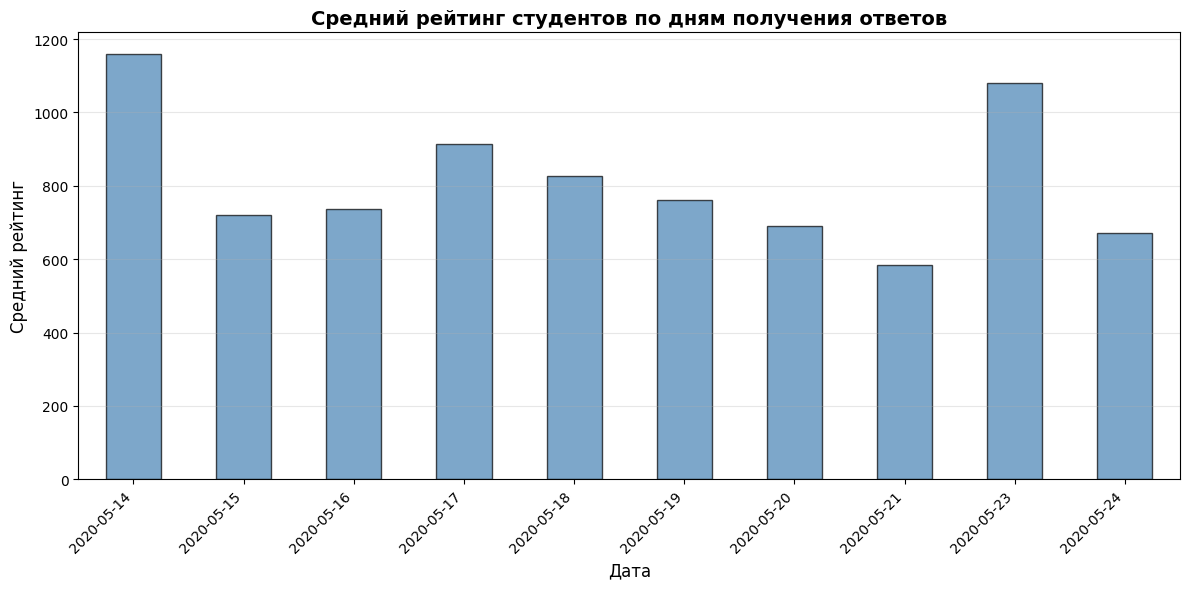

In [26]:
import matplotlib.pyplot as plt


df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# Группируем по дате и считаем средний перцентиль
daily_rating = df.groupby('date')['rating'].mean()

# Строим bar plot
plt.figure(figsize=(12, 6))
daily_rating.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Средний рейтинг студентов по дням получения ответов', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('data/output/laboratory_work1/rating_by_day.png', format='png', bbox_inches='tight')
plt.show()

### Проверка

In [27]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

## Задание №8
Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

In [28]:
df['two_courses_fall'] = 1

df.loc[(df['17_group'] >= 171) & (df['17_group'] <= 173), 'two_courses_fall'] = 2

df.loc[df['is_mi'] == 1, 'two_courses_fall'] = 2

print(f"Студентов с 1 курсом: {(df['two_courses_fall'] == 1).sum()}")
print(f"Студентов с 2 курсами: {(df['two_courses_fall'] == 2).sum()}")

Студентов с 1 курсом: 258
Студентов с 2 курсами: 89


### Проверка

In [29]:
col_name =  'two_courses_fall'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

## Задание №9
Распределите студентов в соответствии с первым приоритетом

In [30]:
df_priority1 = df[['id', 'percentile', 'fall_1', 'fall_2', 'two_courses_fall']].copy()

df_priority1.loc[df_priority1['two_courses_fall'] == 1, 'fall_2'] = ''

df_priority1_melted = df_priority1.melt(
    id_vars=['id', 'percentile'],
    value_vars=['fall_1', 'fall_2'],
    var_name='fall',
    value_name='courses'
).sort_values(['percentile', 'id'])

df_priority1_melted = df_priority1_melted[df_priority1_melted['courses'] != '']

print(f"Всего заявок на первый приоритет: {len(df_priority1_melted)}")

df['is_first_place'] = np.nan
df['is_last_place'] = np.nan

for course in df_priority1_melted['courses'].unique():
    temp = df_priority1_melted[
        df_priority1_melted['courses'] == course
    ].groupby(['courses', 'id'])['percentile'].mean().sort_values().reset_index()

    if course == 'Statistical Learning Theory':
        places = 60
    elif course == 'Высокопроизводительные вычисления':
        places = 60
    elif course == 'Анализ неструктурированных данных':
        places = len(temp)
    else:
        places = 30

    accepted = temp.head(places)

    if len(accepted) > 0:
        best_student = accepted.iloc[0]['id']
        worst_student = accepted.iloc[-1]['id']

        df.loc[df['id'] == best_student, 'is_first_place'] = True
        df.loc[df['id'] == worst_student, 'is_last_place'] = True

print(f"Студентов с is_first_place: {df['is_first_place'].notna().sum()}")
print(f"Студентов с is_last_place: {df['is_last_place'].notna().sum()}")

Всего заявок на первый приоритет: 436
Студентов с is_first_place: 10
Студентов с is_last_place: 12


/tmp/ipykernel_26349/3371621462.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['id'] == best_student, 'is_first_place'] = True
/tmp/ipykernel_26349/3371621462.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['id'] == worst_student, 'is_last_place'] = True


Проверка

In [31]:
!wget  -O 'data/input/laboratory_work1/2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('data/input/laboratory_work1/2_task_check.csv')

In [32]:
fir_col_name =  'is_first_place'
last_col_name =  'is_last_place'


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

## Задание №10
Проведите все три волны отбора студентов на курсы по выбору

In [33]:
fall_courses = pd.DataFrame()
fall_courses['id'] = df['id']
fall_courses['course1'] = ''
fall_courses['course2'] = ''
fall_courses.loc[df['two_courses_fall'] == 1, 'course2'] = '-'

df_fall = df[['id', 'fall_1', 'fall_2', 'fall_3', 'percentile', 'two_courses_fall']].copy()

df_fall = df_fall.melt(
    id_vars=['id', 'percentile', 'two_courses_fall'],
    value_vars=['fall_1', 'fall_2', 'fall_3'],
    var_name='fall',
    value_name='value'
).sort_values(by=['percentile', 'id'])

# Добавляем волну отбора
df_fall['wave'] = 0

# Для студентов с 1 курсом
df_fall.loc[(df_fall['two_courses_fall'] == 1) & (df_fall['fall'] == 'fall_1'), 'wave'] = 1
df_fall.loc[(df_fall['two_courses_fall'] == 1) & (df_fall['fall'] == 'fall_2'), 'wave'] = 2
df_fall.loc[(df_fall['two_courses_fall'] == 1) & (df_fall['fall'] == 'fall_3'), 'wave'] = 3

# Для студентов с 2 курсами
df_fall.loc[(df_fall['two_courses_fall'] == 2) &
            ((df_fall['fall'] == 'fall_1') | (df_fall['fall'] == 'fall_2')), 'wave'] = 1
df_fall.loc[(df_fall['two_courses_fall'] == 2) & (df_fall['fall'] == 'fall_3'), 'wave'] = 2

# Удаляем дубликаты
df_fall = df_fall.drop_duplicates(subset=['id', 'value'])

# Словарь с количеством мест
courses_available_places = {}
for course in df_fall['value'].unique():
    if course != '':
        courses_available_places[course] = 30

courses_available_places['Statistical Learning Theory'] = 60
courses_available_places['Высокопроизводительные вычисления'] = 60
courses_available_places['Анализ неструктурированных данных'] = 0  # Бесконечно

print(f"Подготовлено записей: {len(df_fall)}")
print(f"Уникальных курсов: {len(courses_available_places)}")

for wave in range(1, 4):
    print(f"\n{'='*50}")
    print(f"ВОЛНА {wave}")
    print(f"{'='*50}")

    for course in courses_available_places.keys():
        # Фильтруем студентов
        df_fall_temp = df_fall[
            (df_fall['value'] == course) &
            (df_fall['wave'] == wave)
        ].groupby(['value', 'id'])['percentile'].mean().sort_values().reset_index()

        # Определяем количество мест
        if course == 'Анализ неструктурированных данных':
            stud_len = len(df_fall_temp)
        else:
            stud_len = min(courses_available_places[course], len(df_fall_temp))

        if stud_len == 0:
            continue

        # Обновляем места
        if course != 'Анализ неструктурированных данных':
            courses_available_places[course] -= stud_len

        df_fall_temp = df_fall_temp.head(stud_len)

        course_short = course[:40] + "..." if len(course) > 40 else course
        places_left = courses_available_places[course] if course != 'Анализ неструктурированных данных' else '∞'
        print(f"  {course_short:45} | Зачислено: {stud_len:3} | Осталось: {places_left}")

        # Объединяем
        fall_courses = fall_courses.merge(
            df_fall_temp[['id', 'value']],
            on='id',
            how='left'
        )

        # Записываем зачисленных
        fall_courses.loc[
            (fall_courses['value'] == course) &
            (fall_courses['course1'] == ''),
            'course1'
        ] = course

        fall_courses.loc[
            (fall_courses['value'] == course) &
            (fall_courses['course1'] != '') &
            (fall_courses['course1'] != course),
            'course2'
        ] = course

        fall_courses = fall_courses.drop(columns='value')

        # Удаляем полностью зачисленных
        fully_enrolled = fall_courses[
            (fall_courses['course1'] != '') &
            ((fall_courses['course2'] != '') | (fall_courses['course2'] == '-'))
        ]['id'].values

        df_fall = df_fall[~df_fall['id'].isin(fully_enrolled)]

print(f"\n{'='*50}")
print("РАСПРЕДЕЛЕНИЕ ЗАВЕРШЕНО")
print(f"{'='*50}")

print("\nСтатистика распределения:")
print(f"Всего студентов: {len(fall_courses)}")
print(f"Зачислены на 1 курс: {((fall_courses['course1'] != '???') & (fall_courses['course2'] == '-')).sum()}")
print(f"Зачислены на 2 курса: {((fall_courses['course1'] != '???') & (fall_courses['course2'] != '') & (fall_courses['course2'] != '-')).sum()}")
print(f"Не зачислены: {((fall_courses['course1'] == '') | ((fall_courses['course2'] == '') & (fall_courses['course2'] != '-'))).sum()}")
fall_courses.to_csv("data/output/laboratory_work1/res_fall.csv")

Подготовлено записей: 1029
Уникальных курсов: 12

ВОЛНА 1
  Statistical Learning Theory                   | Зачислено:  33 | Осталось: 27
  Высокопроизводительные вычисления             | Зачислено:  44 | Осталось: 16


  Безопасность компьютерных систем              | Зачислено:  30 | Осталось: 0
  Матричные вычисления                          | Зачислено:  15 | Осталось: 15
  Сбор и обработка данных с помощью краудс...   | Зачислено:  30 | Осталось: 0
  Моделирование временных рядов                 | Зачислено:  30 | Осталось: 0
  Язык SQL                                      | Зачислено:  29 | Осталось: 1
  Принятие решений в условиях риска и неоп...   | Зачислено:   8 | Осталось: 22
  Байесовские методы машинного обучения         | Зачислено:  24 | Осталось: 6
  Глубинное обучение в обработке звука          | Зачислено:  23 | Осталось: 7
  Анализ неструктурированных данных             | Зачислено:  48 | Осталось: ∞
  Теория баз данных                             | Зачислено:  14 | Осталось: 16

ВОЛНА 2
  Statistical Learning Theory                   | Зачислено:   8 | Осталось: 19
  Высокопроизводительные вычисления             | Зачислено:  16 | Осталось: 0
  Матричные вычисления                 

## Задание №11
Распределите таким же образом студентов еще и на весенние курсы по выбору

In [34]:
df['spring_courses'] = 1
df.loc[(df['17_group'] >= 171) & (df['17_group'] <= 173), 'spring_courses'] = 2

print(f"Студентов с 1 весенним курсом: {(df['spring_courses'] == 1).sum()}")
print(f"Студентов с 2 весенними курсами: {(df['spring_courses'] == 2).sum()}")

# Результирующая таблица
spring_courses = pd.DataFrame()
spring_courses['id'] = df['id']
spring_courses['course1'] = ''
spring_courses['course2'] = ''
spring_courses.loc[df['spring_courses'] == 1, 'course2'] = '-'

df_spring = df[[
    'id', 'spring_1', 'spring_2', 'spring_3',
    'percentile', 'spring_courses', 'is_ml_student'
]].copy()

df_spring = df_spring.melt(
    id_vars=['id', 'percentile', 'spring_courses', 'is_ml_student'],
    value_vars=['spring_1', 'spring_2', 'spring_3'],
    var_name='spring',
    value_name='value'
).sort_values(by=['percentile', 'id'])

df_spring = df_spring[
    ~((df_spring['is_ml_student'] == 1) &
      (df_spring['value'] == 'Машинное обучение 2'))
].copy()

# Пересчитываем приоритеты
df_spring['new_spring'] = df_spring.groupby('id').cumcount() + 1
df_spring = df_spring.drop(columns='spring').rename(columns={'new_spring': 'spring'})
df_spring = df_spring.drop_duplicates(subset=['id', 'value'])

# Волны
df_spring['wave'] = 0
df_spring.loc[(df_spring['spring_courses'] == 1) & (df_spring['spring'] == 1), 'wave'] = 1
df_spring.loc[(df_spring['spring_courses'] == 1) & (df_spring['spring'] == 2), 'wave'] = 2
df_spring.loc[(df_spring['spring_courses'] == 1) & (df_spring['spring'] == 3), 'wave'] = 3
df_spring.loc[(df_spring['spring_courses'] == 2) &
              ((df_spring['spring'] == 1) | (df_spring['spring'] == 2)), 'wave'] = 1
df_spring.loc[(df_spring['spring_courses'] == 2) & (df_spring['spring'] == 3), 'wave'] = 2

df_spring = df_spring.drop(columns='spring_courses')

# Словарь с местами
spring_places = {}
for course in df_spring['value'].unique():
    if course != '':
        spring_places[course] = 30

spring_places['Обучение с подкреплением'] = 60
spring_places['Анализ данных в бизнесе'] = 60

print(f"Подготовлено записей: {len(df_spring)}")
print(f"Уникальных курсов: {len(spring_places)}")

# Распределение
for wave in range(1, 4):
    print(f"\n{'='*50}")
    print(f"ВОЛНА {wave} (ВЕСНА)")
    print(f"{'='*50}")

    for course in spring_places.keys():
        df_spring_temp = df_spring[
            (df_spring['value'] == course) &
            (df_spring['wave'] == wave)
        ].groupby(['value', 'id'])['percentile'].mean().sort_values().reset_index()

        stud_len = min(spring_places[course], len(df_spring_temp))

        if stud_len == 0:
            continue

        spring_places[course] -= stud_len
        df_spring_temp = df_spring_temp.head(stud_len)

        course_short = course[:40] + "..." if len(course) > 40 else course
        print(f"  {course_short:45} | Зачислено: {stud_len:3} | Осталось: {spring_places[course]}")

        spring_courses = spring_courses.merge(
            df_spring_temp[['id', 'value']],
            on='id',
            how='left'
        )

        spring_courses.loc[
            (spring_courses['value'] == course) &
            (spring_courses['course1'] == ''),
            'course1'
        ] = course

        spring_courses.loc[
            (spring_courses['value'] == course) &
            (spring_courses['course1'] != '') &
            (spring_courses['course1'] != course),
            'course2'
        ] = course

        spring_courses = spring_courses.drop(columns='value')

        fully_enrolled = spring_courses[
            (spring_courses['course1'] != '') &
            ((spring_courses['course2'] != '') | (spring_courses['course2'] == '-'))
        ]['id'].values

        df_spring = df_spring[~df_spring['id'].isin(fully_enrolled)]

print("\nСтатистика весеннего распределения:")
print(f"Всего студентов: {len(spring_courses)}")
print(f"Зачислены на 1 курс: {((spring_courses['course1'] != '') & (spring_courses['course2'] == '-')).sum()}")
print(f"Зачислены на 2 курса: {((spring_courses['course1'] != '') & (spring_courses['course2'] != '') & (spring_courses['course2'] != '-')).sum()}")
print(f"Не зачислены: {((spring_courses['course1'] == '') | ((spring_courses['course2'] == '') & (spring_courses['course2'] != '-'))).sum()}")
spring_courses.to_csv("data/output/laboratory_work1/res_fall_spring.csv")

Студентов с 1 весенним курсом: 274
Студентов с 2 весенними курсами: 73
Подготовлено записей: 1022
Уникальных курсов: 15

ВОЛНА 1 (ВЕСНА)
  Символьные вычисления                         | Зачислено:   9 | Осталось: 21
  Численные методы                              | Зачислено:   9 | Осталось: 21
  Дискретная оптимизация                        | Зачислено:  30 | Осталось: 0
  Промышленное программирование на языке J...   | Зачислено:  30 | Осталось: 0
  Дополнительные главы прикладной статисти...   | Зачислено:  11 | Осталось: 19
  Машинное обучение 2                           | Зачислено:  30 | Осталось: 0
  Проектирование и разработка высоконагруж...   | Зачислено:  30 | Осталось: 0
  Методы сжатия и передачи медиаданных          | Зачислено:  22 | Осталось: 8
  Анализ данных в бизнесе                       | Зачислено:  19 | Осталось: 41
  Обучение с подкреплением                      | Зачислено:  60 | Осталось: 0
  Генеративные модели в машинном обучении       | Зачислено:  16 | Ос